In [1]:
import keras
import numpy as np
import pandas as pd
from sklearn.model_selection import train_test_split
import matplotlib.pyplot as plt

Using TensorFlow backend.


In [2]:
raw_data = pd.read_csv("../dataset/MNIST/train.csv")
data = raw_data.iloc[:,1:].values
labels = keras.utils.to_categorical(raw_data["label"])
train_images, test_images, train_labels, test_labels = train_test_split(data, labels)
input_size = train_images.shape[1]

In [3]:
# data processing, this matters a lot
train_images = train_images / 255
test_images = test_images / 255

In [4]:
# hyper params
batch_size = 128
epochs = 50

In [5]:
def naiveModel(input_size = 784):
    model = keras.Sequential()
    model.add(keras.layers.Dense(512, input_shape=(input_size, ), activation='relu'))
    model.add(keras.layers.Dense(10, activation='softmax'))
    model.compile(optimizer='adam', loss='categorical_crossentropy', metrics=['accuracy'])
    return model

In [6]:
model = naiveModel(input_size)
model.summary(0)
history = model.fit(train_images, train_labels, epochs=epochs, batch_size=batch_size, verbose=0, validation_split=0.2)

_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense_1 (Dense)              (None, 512)               401920    
_________________________________________________________________
dense_2 (Dense)              (None, 10)                5130      
Total params: 407,050
Trainable params: 407,050
Non-trainable params: 0
_________________________________________________________________


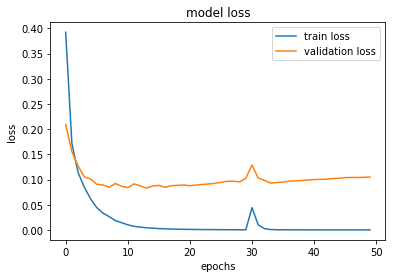

In [7]:
# print train loss and validation loss
plt.plot(history.history['loss'], label='train loss')
plt.plot(history.history['val_loss'], label='validation loss')
plt.title('model loss')
plt.xlabel('epochs')
plt.ylabel('loss')
plt.legend()
plt.show()

In [8]:
_, acc = model.evaluate(test_images, test_labels, batch_size=batch_size) 
print(acc)

10500/10500 [==============================] - 0s 10us/step
0.9777142857142858


In [9]:
# above result is clearly overfitting, so we use serval ways to reduce 
# common dropout 
def dropModel(input_size = 784):
    model = keras.Sequential()
    model.add(keras.layers.Dense(512, input_shape=(input_size, ), activation='relu'))
    model.add(keras.layers.Dropout(0.5))
    model.add(keras.layers.Dense(10, activation='softmax'))
    model.compile(optimizer='adam', loss='categorical_crossentropy', metrics=['accuracy'])
    return model

In [10]:
dModel = dropModel(input_size)
dModel.summary()
dhist = dModel.fit(train_images, train_labels, epochs=epochs, batch_size=batch_size, verbose=0, validation_split=0.2)

_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense_3 (Dense)              (None, 512)               401920    
_________________________________________________________________
dropout_1 (Dropout)          (None, 512)               0         
_________________________________________________________________
dense_4 (Dense)              (None, 10)                5130      
Total params: 407,050
Trainable params: 407,050
Non-trainable params: 0
_________________________________________________________________


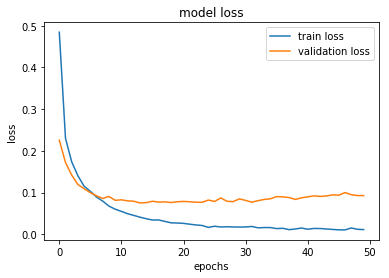

In [11]:
# print train loss and validation loss
plt.plot(dhist.history['loss'], label='train loss')
plt.plot(dhist.history['val_loss'], label='validation loss')
plt.title('model loss')
plt.xlabel('epochs')
plt.ylabel('loss')
plt.legend()
plt.show()

In [12]:
_, dAcc = dModel.evaluate(test_images, test_labels, batch_size=batch_size) 
print(dAcc)

10500/10500 [==============================] - 0s 10us/step
0.979047619047619


In [13]:
# Batch Normalization
def normModel(input_size = 784):
    model = keras.Sequential()
    model.add(keras.layers.Dense(512, input_shape=(input_size, ), activation='relu'))
    model.add(keras.layers.BatchNormalization())
    model.add(keras.layers.Dense(10, activation='softmax'))
    model.compile(optimizer='adam', loss='categorical_crossentropy', metrics=['accuracy'])
    return model

In [14]:
nModel = normModel(input_size)
nModel.summary()
nhist = nModel.fit(train_images, train_labels, epochs=epochs, batch_size=batch_size, verbose=0, validation_split=0.2)

_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense_5 (Dense)              (None, 512)               401920    
_________________________________________________________________
batch_normalization_1 (Batch (None, 512)               2048      
_________________________________________________________________
dense_6 (Dense)              (None, 10)                5130      
Total params: 409,098
Trainable params: 408,074
Non-trainable params: 1,024
_________________________________________________________________


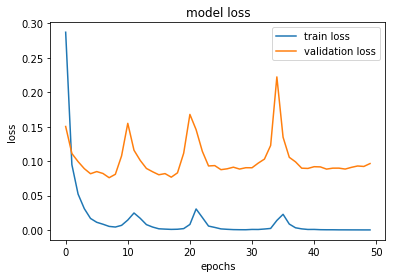

In [15]:
# print train loss and validation loss
plt.plot(nhist.history['loss'], label='train loss')
plt.plot(nhist.history['val_loss'], label='validation loss')
plt.title('model loss')
plt.xlabel('epochs')
plt.ylabel('loss')
plt.legend()
plt.show()

In [16]:
_, nAcc = nModel.evaluate(test_images, test_labels, batch_size=batch_size) 
print(nAcc)

10500/10500 [==============================] - 0s 11us/step
0.9796190476190476


In [17]:
# add weights regulizer
def regModel(input_size = 784):
    model = keras.Sequential()
    model.add(keras.layers.Dense(512, input_shape=(input_size, ), activation='relu', kernel_regularizer=keras.regularizers.l2(0.01)))
    model.add(keras.layers.Dense(10, activation='softmax'))
    model.compile(optimizer='adam', loss='categorical_crossentropy', metrics=['accuracy'])
    return model

In [18]:
rModel = regModel(input_size)
rModel.summary()
rhist = rModel.fit(train_images, train_labels, epochs=epochs, batch_size=batch_size, verbose=0, validation_split=0.2)

_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense_7 (Dense)              (None, 512)               401920    
_________________________________________________________________
dense_8 (Dense)              (None, 10)                5130      
Total params: 407,050
Trainable params: 407,050
Non-trainable params: 0
_________________________________________________________________


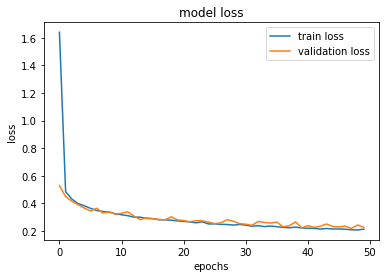

In [19]:
# print train loss and validation loss
plt.plot(rhist.history['loss'], label='train loss')
plt.plot(rhist.history['val_loss'], label='validation loss')
plt.title('model loss')
plt.xlabel('epochs')
plt.ylabel('loss')
plt.legend()
plt.show()

In [20]:
_, rAcc = rModel.evaluate(test_images, test_labels, batch_size=batch_size) 
print(rAcc)

10500/10500 [==============================] - 0s 10us/step
0.9664761904761905


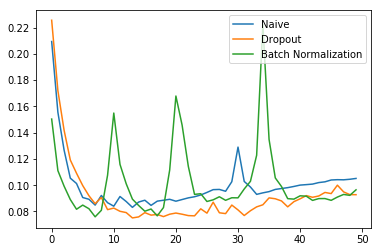

In [22]:
# General Results after reducing overfitting
plt.plot(history.history['val_loss'], label='Naive')
plt.plot(dhist.history['val_loss'], label='Dropout')
plt.plot(nhist.history['val_loss'], label='Batch Normalization')
#plt.plot(rhist.history['val_loss'], label='regulizer')
plt.legend()
plt.show()